# Arable Pulsepod <> Driscolls Data Query

In [1]:
#type your email address and the desired file name for the .csv file ending in .csv
email = 'taylor@arable.com'
csvfilename = 'driscolls.csv'
device = 'aeb8c097-27b8-45d8-9e83-bec882dc8b5e' #B00017 deployed on 9/20/2016
#device = 'a511715d-743c-45e8-b369-0eff6328837a' B00018 deployed on 8/8/2016

In [2]:
from arable.client import ArableClient
a = ArableClient()
a.connect(email, 'arable1', 'arable')

/usr/local/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


In [3]:
result = a.query(select='all', #'all' or 'radiometer' or 'spectrometer' or 'microclimate'
                 format='csv',
                 devices=[device],
                start='2016-09-20',
                end='2016-09-27') 

time,B1dw,B1uw,B2dw,B2uw,B3dw,B3uw,B4dw,B4uw,B5dw,B5uw,B6dw,B6uw,B7dw,B7uw,LWdw,LWuw,P,PARdw,PARuw,RH,SWdw,SWuw,S_dw,S_uw,Tabove,Tair,Tbelow,deployment_id,device_id,dqs,group_id,lat,long
2016-09-26T23:58:32Z,78.8878322147,0,59.6055752449,3.49690944219,48.4117715012,3.02497132244,57.5103427387,3.74414612047,20.8047381728,5.05636114126,4.30089149931,46.2290946749,0,0.01299,380.740819826,-461.592088193,101100,728.1693055,0,50.0120307707,378.744996,0,6.04860032803e-14,2.71393247674e-13,13.060612018,23.0977817,27.1784862528,f1131afb-9738-4a3e-ad1d-63972b020dfa,aeb8c097-27b8-45d8-9e83-bec882dc8b5e,4,573a199417d33307faa9e48b,0,0
2016-09-26T23:53:32Z,82.4935762443,0,62.1795359279,3.66789397327,50.3074745537,3.02497132244,59.6092603569,3.96856885041,21.7079378839,5.27281762374,4.51557014476,46.351071178,0,0.0116,379.049366638,-463.538532709,101100,764.6759068,0,54.1635864243,397.7332896,0,6.05396510741e-14,2.71617945069e-13,12.7421505193,22.3406351,27.4946462345,f1131afb-9738-4a3e-ad1d-63972b02

In [4]:
def write_csv(f, data):
    with open(f, 'wb') as csvfile:
        csvfile.write(data)
        csvfile.close()

In [5]:
write_csv(csvfilename, result) 

In [7]:
#if you would like to work with the data in a pandas dataframe... if you just want to look at a csv file, you're done!
from pandas import DataFrame
import pandas as pd
from io import StringIO
result = StringIO(result)
df = pd.read_csv(result,sep=',')
idx = pd.DatetimeIndex(df['time'])
df = df.set_index(idx, 'time')
df.groupby(pd.TimeGrouper(freq='D'), axis=0)
df = df.sort_index()
df['P'] = df['P'] / 1000.


TypeError: initial_value must be unicode or None, not _io.StringIO

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

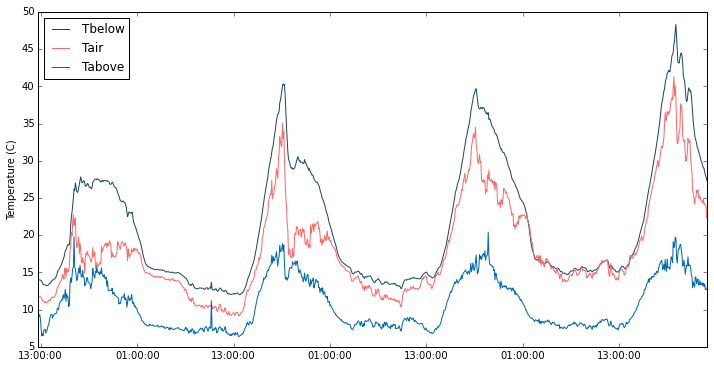

In [38]:
fig, axes = plt.subplots(figsize=(12,6))
line1, = axes.plot(df.index, df['Tbelow'], color='#174a63', label = 'Tbelow')
line2, = axes.plot(df.index, df['Tair'], color='#ff6768', label = 'Tair')
line3, = axes.plot(df.index, df['Tabove'], color='#0067B5', label = 'Tabove')
axes.set_ylabel('Temperature (C)')
axes.legend(handles=[line1, line2, line3], loc=2)


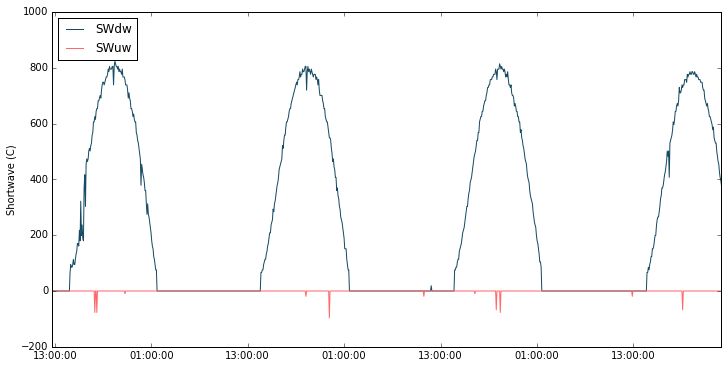

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
line1, = axes.plot(df.index, df['SWdw'], color='#174a63', label = 'SWdw')
line2, = axes.plot(df.index, df['SWuw'], color='#ff6768', label = 'SWuw')
axes.set_ylabel('Shortwave (C)')
axes.legend(handles=[line1, line2], loc=2)


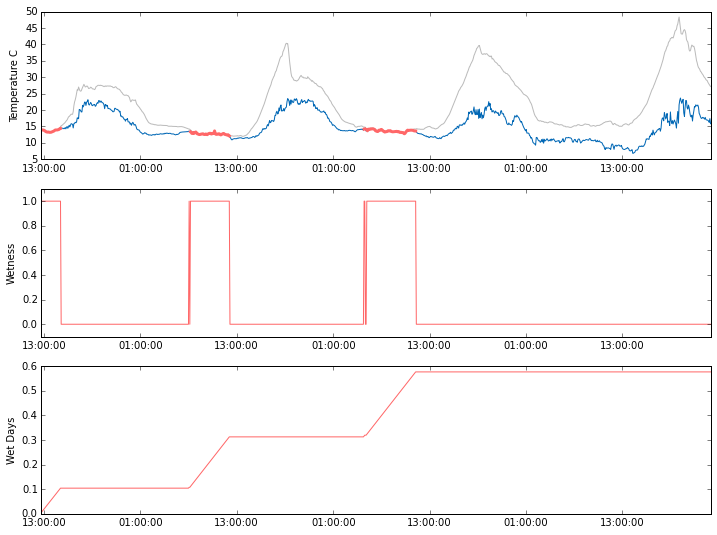

In [37]:
from arable_physics import *

df['Tdew_leaf'] = Tdew_(df['Tbelow'], df['RH']/100)
df['Tdew_leaf_mk'] = df['Tdew_leaf']
df['Wet_leaf'] = df['Tdew_leaf'] >= df['Tbelow']*0.95
df['Tdew_air'] = Tdew_(df['Tair'], df['RH']/100)
df['Tdew_air_mk'] = Tdew_(df['Tdew_air'], df['RH']/100)
df['Wet_air'] = df['Tdew_air'] >= df['Tair']*0.95
mask = ~df['Wet_leaf']
df['Tdew_leaf_mk'].loc[mask] = np.nan

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,9))
line1, = axes[0].plot(df.index, df['Tdew_leaf'], color='#0067B5', label = 'Tdew', linewidth=1)
line2, = axes[0].plot(df.index, df['Tbelow'], color='#bbbbbb', label = 'Tleaf')
line3, = axes[0].plot(df.index, df['Tdew_leaf_mk'], color='#ff6768', label = 'Tdew', linewidth=3)
axes[0].set_ylabel('Temperature C')

line1, = axes[1].plot(df.index, df['Wet_leaf']*1, color='#ff6768', label = 'Tdew')
axes[1].set_ylim([-0.1, 1.1])
axes[1].set_ylabel('Wetness')

line1, = axes[2].plot(df.index, np.cumsum(df['Wet_leaf']/288), color='#ff6768', label = 'Tdew')
axes[2].set_ylabel('Wet Days')


AttributeError: 'list' object has no attribute 'get_label'

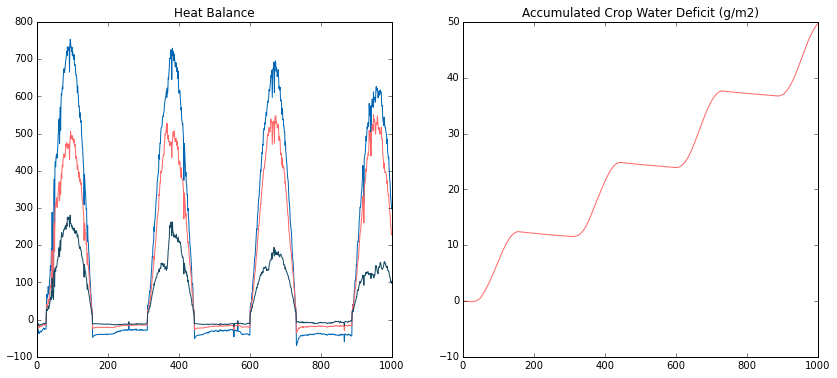

In [65]:
Delta = s_(df['Tair'])  # kPa / C
Rn = df['SWdw'] + df['SWuw'] + df['LWdw'] + df['LWuw']  # W/m2
rho = dry_air_(df['Tair'], df['RH'], df['P']) # kg / m3
VPD = VPD_(df['Tair'], df['RH'])
rH = 500 # s/m
gamma = gamma_(df['Tair'], df['P']) # kPa / C

LE = (Delta*Rn + rho*Cp*VPD/rH) / (Delta + gamma)
H = (gamma*Rn + rho*Cp*VPD/rH) / (Delta + gamma)
E = LE / lambda_(df['Tair'])

fig, axes = plt.subplots(1, 2, figsize=(14,6))

line1 = axes[0].plot(Rn, color='#0067B5', label="Rn")
line2 = axes[0].plot(LE, color='#ff6768', label="LE")
line3 = axes[0].plot(H, color='#174a63', label="H")
axes[0].set_title("Heat Balance")

axes[1].plot(np.cumsum(E), color='#ff6768')
axes[1].set_title("Accumulated Crop Water Deficit (g/m2)")

axes[0].legend(handles=[line1, line2, line3], loc=1)


In [58]:
gamma

2016-09-23 12:36:37    0.066544
2016-09-23 12:41:37    0.066548
2016-09-23 12:46:38    0.066549
2016-09-23 12:51:38    0.066549
2016-09-23 12:56:38    0.066545
2016-09-23 13:01:39    0.066540
2016-09-23 13:06:39    0.066526
2016-09-23 13:11:40    0.066516
2016-09-23 13:16:40    0.066506
2016-09-23 13:21:40    0.066502
2016-09-23 13:26:41    0.066496
2016-09-23 13:31:41    0.066506
2016-09-23 13:36:41    0.066497
2016-09-23 13:41:42    0.066494
2016-09-23 13:47:34    0.066502
2016-09-23 13:52:34    0.066501
2016-09-23 13:57:35    0.066511
2016-09-23 14:02:35    0.066518
2016-09-23 14:07:36    0.066510
2016-09-23 14:12:36    0.066523
2016-09-23 14:17:36    0.066536
2016-09-23 14:22:37    0.066541
2016-09-23 14:27:37    0.066541
2016-09-23 14:32:37    0.066537
2016-09-23 14:37:38    0.066605
2016-09-23 14:42:38    0.066615
2016-09-23 14:47:39    0.066626
2016-09-23 14:52:39    0.066633
2016-09-23 14:57:39    0.066665
2016-09-23 15:02:40    0.066688
                         ...   
2016-09-